In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def MF(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    '''
    -----------------------------------
    参数：
    R        --  原始矩阵
    P        --  用户与主题间的关系矩阵
    Q        --  主题与特征间的关系矩阵
    K        --  特征个数
    steps    --  迭代次数
    -----------------------------------
    输出：
    results  --  损失值的集合
    ans      --  更新后的矩阵
    -----------------------------------   
    '''
    results = []
    
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e_ij = R[i][j] - np.dot(P[i,:], Q[:,j])  # 求解误差
                    for k in range(K):
                        # 使用梯度下降法获得修正的 p 和 q 分量
                        P[i][k] += alpha*(2*e_ij*Q[k][j] - beta*P[i][k])
                        Q[k][j] += alpha*(2*e_ij*P[i][k] - beta*Q[k][j])
                                       
        e = 0
        ans = np.dot(P, Q) 
        
        # 求解 sum(e^2)
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e += pow(R[i][j] - np.dot(P[i,:], Q[:,j]), 2)
                    for k in range(K):
                        e += beta/2 * pow(P[i][k], 2) + pow(Q[k][j], 2)
        results.append(e)
        
        # 当 e < 0.001 时收敛
        if e < 0.001:
            break
            
    return results, ans

In [3]:
R = np.array(
        [[5,3,0,1],
         [4,0,0,1],
         [1,1,0,5],
         [1,0,0,4],
         [0,1,5,4]]
        )

K = 2
N, M = R.shape

P = np.random.rand(N, K)
Q = np.random.rand(K, M)

results, ans = MF(R, P, Q, K)
print("经过 MF 算法填充 0 处评分值后的评分矩阵为：\n", ans)

经过 MF 算法填充 0 处评分值后的评分矩阵为：
 [[4.98689777 2.95687193 4.18898928 0.99943229]
 [3.97035449 2.36488074 3.53066148 0.99810776]
 [1.05007837 0.87499571 5.47509611 4.96400345]
 [0.97404691 0.77812767 4.46874781 3.97334462]
 [1.61432445 1.1537608  4.93368441 4.0262201 ]]


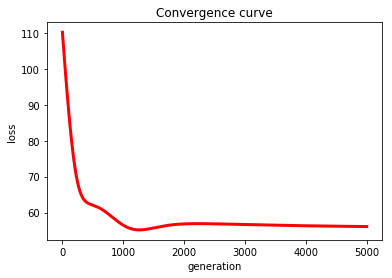

In [4]:
x=range(len(results))

plt.plot(x, results, 'r', linewidth=3)
plt.title("Convergence curve")
plt.xlabel("generation")
plt.ylabel("loss")

plt.show()

The latent feature of new comer(user) is :  [1.70062872 0.16298065]
3.736559139784946 1581
the sparse rate of rating matrix is : 0.632
[[-7.30451966e-02 -4.90572672e-01]
 [ 2.51495674e-01 -2.64725351e-01]
 [-4.85453041e-01 -1.74007411e-01]
 [-9.15245836e-01 -6.48017956e-01]
 [ 2.98403294e-01  2.00880440e-01]
 [-1.73282655e-01 -5.77310912e-01]
 [-7.37646524e-02 -1.80191614e-01]
 [ 3.78493073e-01  1.48149723e-01]
 [ 3.11971169e-02 -4.35521663e-01]
 [-1.52715734e+00 -7.34972283e-01]
 [ 5.15585804e-02  1.71670904e-01]
 [-1.85983460e-01  5.67135265e-02]
 [-5.86457820e-02  6.55144458e-02]
 [ 1.02633161e+00 -1.34190766e+00]
 [ 1.26882045e-02  6.92017360e-02]
 [-1.61760216e-02  2.05863112e-01]
 [ 2.19819740e-02 -9.77947945e-02]
 [-1.22070362e-03  2.30993614e-01]
 [-6.35672761e-02  3.27979877e-01]
 [ 3.39194248e-02 -1.53681611e-01]
 [ 5.60331277e-01  1.86518733e-01]
 [-1.56802890e-01  3.86207281e-01]
 [ 2.66545935e-01  1.89295789e-01]
 [ 1.67208938e-01  2.39433784e-01]
 [-6.60505876e-01  1.0454

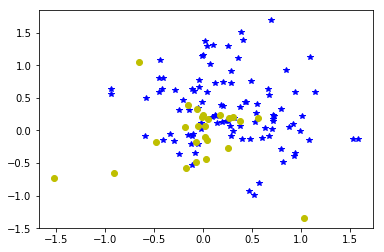

[[4.04832578 3.87560298 4.19554823 ... 3.87758255 3.61172351 2.91252455]
 [3.82863493 3.65571151 3.96180918 ... 3.66537027 3.40258569 2.74386011]
 [3.83609197 3.77409691 4.03994101 ... 3.6932796  3.56192533 2.87251475]
 ...
 [4.41358084 4.29407295 4.61762622 ... 4.24027541 4.03201337 3.25154993]
 [3.53102336 3.48414854 3.72511    ... 3.40147047 3.29264597 2.65536864]
 [4.05939086 4.19838149 4.40458584 ... 3.94645778 4.05007264 3.26646706]] [[4.14805479 3.8689619  4.41563627 ... 4.00133221 3.76136762 2.86330485]
 [3.94839738 3.8003943  4.02092898 ... 3.76716426 3.51511901 2.88207816]
 [3.88348552 3.63942693 4.30145579 ... 3.77636415 3.65218862 2.65714031]
 ...
 [4.46181582 4.46805664 4.4536732  ... 4.27585697 4.09706182 3.65252898]
 [3.7187193  3.72467584 3.75101801 ... 3.54248322 3.38723279 2.90896435]
 [4.10368978 4.23696429 4.41026562 ... 4.00573209 4.11127064 3.50614523]]
the MSE of the matrix factorization is 0.6266
the MSE of the matrix factorization with considering bias is 0.520

In [5]:
from numpy import *
from numpy import random
import matplotlib.pyplot as plt

# load data to build real rating matrix
file_name = 'data/MF/user_item_rating.txt'
rating_matrix = loadtxt(file_name, dtype=bytes).astype(float)
user_num = rating_matrix.shape[0]
item_num = rating_matrix.shape[1]

# initialize user and item matrix with random float between -1 and 1(not included)
feature_num = 2
user_matrix = random.random_sample((user_num, feature_num))
item_matrix = random.random_sample((item_num, feature_num))


def sgd(data_matrix, user, item, alpha, lam, iter_num):

    for j in range(iter_num):
        for u in range(data_matrix.shape[0]):
            for i in range(data_matrix.shape[1]):
                if data_matrix[u][i] != 0:
                    e_ui = data_matrix[u][i] - sum(user[u,:] * item[i,:])
                    user[u,:] += alpha * (e_ui * item[i,:] - lam * user[u,:])
                    item[i,:] += alpha * (e_ui * user[u,:] - lam * item[i,:])
    return user, item

user, item = sgd(rating_matrix, user_matrix, item_matrix, 0.001, 0.1, 1000)
filter_matrix_entry = rating_matrix <= 0
matrix_predict = dot(user, item.transpose())

# filter the ratings that are already rated
matrix_predict_filtered = matrix_predict * filter_matrix_entry
# save matrix_predict and matrix_predict_filtered to the files respectively
# and make every element correct to two decimal places
savetxt('data/MF/matrix_predict.txt', matrix_predict, fmt='%.2f')
savetxt('data/MF/matrix_predict_filtered.txt', matrix_predict_filtered, fmt='%.2f')

# MF for new comer
# randomly initialize the new comer's rate
new_comer_Eric = random.randint(0, 6, size=100)
rating_matrix_new = vstack((rating_matrix, new_comer_Eric))
user_matrix_new = 2 * random.random_sample((user_num+1, feature_num)) - 1
item_matrix_new = 2 * random.random_sample((item_num, feature_num)) - 1
user_new, item_new = sgd(rating_matrix_new, user_matrix_new, item_matrix_new, 0.01, 0.1, 100)
print('The latent feature of new comer(user) is : ', user_new[-1, :])


# let us put bias into the model
# get the overall average rating
def get_miu(data_matrix):

    non_zero_num = 0
    non_zero_sum = 0
    for i in range(data_matrix.shape[0]):
        for j in range(data_matrix.shape[1]):
            if data_matrix[i][j] != 0:
                non_zero_num += 1
                non_zero_sum += data_matrix[i][j]
    return non_zero_sum/non_zero_num, non_zero_num


# the sgd funtion with bias, note that bu and bi shoulde also be trained!(very important)
def sgd_bias(data_matrix, user, item, alpha, lam, iter_num, miu):

    b_u = [1] * rating_matrix.shape[0]
    b_i = [1] * rating_matrix.shape[1]
    for j in range(iter_num):
        for u in range(data_matrix.shape[0]):
            for i in range(data_matrix.shape[1]):
                if data_matrix[u][i] != 0:
                    b_ui = b_u[u] + b_i[i] + miu
                    e_ui = data_matrix[u][i] - b_ui - sum(user[u,:] * item[i,:])
                    user[u,:] += alpha * (e_ui * item[i,:] - lam * user[u,:])
                    item[i,:] += alpha * (e_ui * user[u,:] - lam * item[i,:])
                    b_u[u] += alpha * (e_ui - lam * b_u[u])
                    b_i[i] += alpha * (e_ui - lam * b_i[i])
    return user, item, b_u, b_i

miu, non_zero_num = get_miu(rating_matrix)
print(miu, non_zero_num)
print('the sparse rate of rating matrix is : %.3f' % (non_zero_num/2500))


user_bias, item_bias, b_u, b_i = sgd_bias(rating_matrix, user_matrix, item_matrix, 0.001, 0.1, 1000, miu)
print(user_bias)

# visualize user and item feature
plt.plot(item_bias[:, 0], item_bias[:, 1], 'b*')
plt.plot(user_bias[:, 0], user_bias[:, 1], 'yo')
plt.show()

# calculate MSE
def cal_MSE(data_matrix, predict_matrix, non_zero_num):
    filter_matrix_entry = data_matrix > 0
    predict_matrix_filtered = predict_matrix * filter_matrix_entry
    diff_matrix = (predict_matrix_filtered - data_matrix) * (predict_matrix_filtered - data_matrix)
    mse = (1/non_zero_num) * (diff_matrix.sum())
    return mse

# get the right predictive matrix with bias
matrix_predict_bias = dot(user_bias, item_bias.transpose())
for u in range(matrix_predict_bias.shape[0]):
    for i in range(matrix_predict_bias.shape[1]):
        matrix_predict_bias[u][i] += (miu + b_u[u] + b_i[i])

print(matrix_predict, matrix_predict_bias)
mse = cal_MSE(rating_matrix, matrix_predict, non_zero_num)
mse_bias = cal_MSE(rating_matrix, matrix_predict_bias, non_zero_num)
print('the MSE of the matrix factorization is %.4f' % mse)
print('the MSE of the matrix factorization with considering bias is %.4f' % mse_bias)